In [10]:
import pandas as pd
import numpy as np
from utils import coord_rotate
import os
import importlib
import glob
import matplotlib.pyplot as plt

In [2]:
in_dir = "C:/Users/moo90/Box/data/materhorn/ES/ES3/raw_20hz/parq"

files = glob.glob(os.path.join(in_dir, '*.parquet'))


In [3]:
def dr_apply(df):

    wind_vect0 = df.values
    wind_vect1 = coord_rotate.yaw_correct(wind_vect0)
    wind_vect2 = coord_rotate.pitch_correct(wind_vect1)
    
    return np.nanmean(wind_vect2[:,0])

In [4]:
dr_df = pd.DataFrame(columns=[f'u_dr_{h}' for h in ['0.5', '2', '5', '10', '20']])

# Ignore first date (9/21) b/c of outliers
for i, f in enumerate(files[1:]):

    temp_df = pd.read_parquet(f)
    u_dr_list = []

    # Loop through heights
    for h in ['0.5', '2', '5', '10', '20']:

        # Subset and apply dr
        temp_group = temp_df.loc[:,[f'{v}_{h}' for v in ['ux', 'uy', 'uz']]].groupby(pd.Grouper(freq='5T', closed='right', label='right'), group_keys=False)
        #dr_df.loc[temp_df.index, f'u_dr_{h}'] = temp_group.apply(dr_apply)

        u_dr_list.append(temp_group.apply(dr_apply).to_frame(f'u_dr_{h}'))

    temp_dr = pd.concat(u_dr_list, axis=1)
    dr_df = pd.concat([dr_df, temp_dr])


c:\Users\moo90\Box\git\topoFlux\topoFlux\utils\coord_rotate.py:85: RuntimeWarning: Mean of empty slice
  u_mean = np.nanmean(wind_vect[:,0])
c:\Users\moo90\Box\git\topoFlux\topoFlux\utils\coord_rotate.py:86: RuntimeWarning: Mean of empty slice
  v_mean = np.nanmean(wind_vect[:,1])
c:\Users\moo90\Box\git\topoFlux\topoFlux\utils\coord_rotate.py:65: RuntimeWarning: Mean of empty slice
  u_mean = np.nanmean(wind_vect[:,0])
c:\Users\moo90\Box\git\topoFlux\topoFlux\utils\coord_rotate.py:66: RuntimeWarning: Mean of empty slice
  w_mean = np.nanmean(wind_vect[:,2])
<ipython-input-3-565e4a183886>:7: RuntimeWarning: Mean of empty slice
  return np.nanmean(wind_vect2[:,0])


In [5]:
dr_df.to_csv("C:/Users/moo90/Box/data/materhorn/ES/ES3/u_dr.csv")

In [7]:
test_winds = pd.read_csv("C:/Users/moo90/Box/data/materhorn/ES_5min/data_tables/ES3/spdanddir.txt", index_col=[0], parse_dates=True)

In [9]:
test_all = pd.concat([dr_df, test_winds], axis=1)

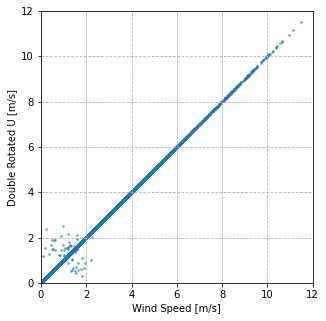

In [20]:
fig, ax = plt.subplots(**{'figsize':(5,5)})
ax.axis('square')
ax.scatter(test_all['0_5m_speed'], test_all['u_dr_0.5'], s=3, alpha=.5)
ax.set(xlim=(0,12), ylim=(0,12), xlabel='Wind Speed [m/s]', ylabel='Double Rotated U [m/s]')
ax.grid(ls='--')
